In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
import os
import pathlib
import zipfile
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

## Get the Data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# wget is just used to get the file

--2023-02-21 03:31:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  30.8MB/s    in 4.2s    

2023-02-21 03:31:48 (24.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# unzip the zip file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

## Inspect the data (become one with it)

In [ ]:
!ls pizza_steak
# ls stands for LIST

test  train


In [ ]:
!ls pizza_steak/train
# we select the train sub-folder in the pizza_steak folder

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
# Walk through pizza_steak directory and list number of files
import pathlib
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"): # os has in walk function
  print(f"There are {len(dirnames)} directories and {len(filenames)} in {dirpath}")

There are 2 directories and 0 in pizza_steak
There are 2 directories and 0 in pizza_steak/test
There are 0 directories and 250 in pizza_steak/test/steak
There are 0 directories and 250 in pizza_steak/test/pizza
There are 2 directories and 0 in pizza_steak/train
There are 0 directories and 750 in pizza_steak/train/steak
There are 0 directories and 750 in pizza_steak/train/pizza


In [ ]:
os.listdir("pizza_steak/train/steak") # lists directories

['2499364.jpg',
 '523535.jpg',
 '838344.jpg',
 '31881.jpg',
 '2045647.jpg',
 '168775.jpg',
 '3465327.jpg',
 '3547166.jpg',
 '1945132.jpg',
 '1684438.jpg',
 '345734.jpg',
 '2400975.jpg',
 '2563233.jpg',
 '911803.jpg',
 '60633.jpg',
 '179293.jpg',
 '1312841.jpg',
 '3444407.jpg',
 '465494.jpg',
 '3857508.jpg',
 '3700079.jpg',
 '126345.jpg',
 '3434983.jpg',
 '3157832.jpg',
 '1828502.jpg',
 '1445352.jpg',
 '2878151.jpg',
 '2233395.jpg',
 '3142674.jpg',
 '3518960.jpg',
 '2966859.jpg',
 '2909031.jpg',
 '217996.jpg',
 '361067.jpg',
 '1736543.jpg',
 '2012996.jpg',
 '1621763.jpg',
 '822550.jpg',
 '1333055.jpg',
 '1714605.jpg',
 '285045.jpg',
 '3745515.jpg',
 '3082120.jpg',
 '3868959.jpg',
 '658189.jpg',
 '447557.jpg',
 '3777020.jpg',
 '15580.jpg',
 '468384.jpg',
 '1343209.jpg',
 '37384.jpg',
 '1295457.jpg',
 '945791.jpg',
 '1264858.jpg',
 '1375640.jpg',
 '1367035.jpg',
 '2910418.jpg',
 '1682496.jpg',
 '493029.jpg',
 '3274423.jpg',
 '2965021.jpg',
 '3298495.jpg',
 '9555.jpg',
 '2668916.jpg',
 '28

In [ ]:
# another way to find the number of files in a directory
num_steak_train_images = len(os.listdir("pizza_steak/train/steak")) # listdir is a method to list all the
num_steak_train_images

750

## To visualise the images

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
#In Python, the glob module is used to retrieve files/pathnames matching a specified pattern. The pattern rules of glob follow standard Unix path expansion rules.
print(class_names)

['pizza' 'steak']


In [ ]:
len(class_names)

2

In [ ]:
# lets visualise our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class): # both input are in string class

  # setup the target directory we will view images from here
  target_folder = target_dir + target_class

  #Get a random image
  random_img = random.sample(os.listdir(target_folder), 1) #k: An Integer value, it specify the length of a sample.
  '''sample() is an inbuilt function of random module in Python that returns a particular length list of items chosen from the sequence i.e. list, tuple, string or set. Used for random sampling without replacement.'''
  print(random_img)
  print(f"The shape of the random ismage is {len(random_img)}")

  # Now we will read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_img[0]) #random_img[0] as random_img returns a list
  ''' ['2938012.jpg']       we get a list like this thats why we do random_img[0]'''
  plt.imshow(img)
  plt.axis("off");

  print(f"Image Shape : {img.shape}")

  return img

['2087958.jpg']
The shape of the random ismage is 1
Image Shape : (512, 512, 3)


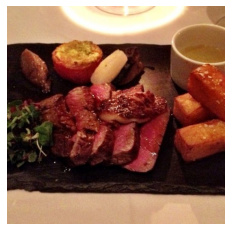

In [ ]:
# View random images from training dataset
image_1 = view_random_image(target_dir = "pizza_steak/train/",
                  target_class = "steak")

In [ ]:
tf.constant(image_1)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[211, 175, 139],
        [209, 174, 136],
        [207, 172, 134],
        ...,
        [159, 117,  69],
        [156, 114,  66],
        [159, 117,  69]],

       [[210, 175, 137],
        [208, 173, 135],
        [206, 171, 133],
        ...,
        [156, 114,  66],
        [157, 115,  67],
        [162, 120,  72]],

       [[208, 173, 135],
        [206, 171, 133],
        [205, 170, 132],
        ...,
        [155, 113,  65],
        [158, 116,  68],
        [161, 119,  71]],

       ...,

       [[202, 157, 126],
        [200, 157, 125],
        [201, 158, 124],
        ...,
        [207, 165, 123],
        [205, 163, 121],
        [202, 160, 118]],

       [[202, 157, 126],
        [199, 156, 124],
        [199, 156, 122],
        ...,
        [205, 163, 121],
        [204, 162, 120],
        [201, 159, 117]],

       [[202, 157, 126],
        [199, 154, 123],
        [198, 155, 121],
        ...,
        [205, 163, 12

In [ ]:
image_1.shape

(512, 512, 3)

In [ ]:
382*512*3

586752

In [ ]:
image_1.max(), image_1.min()

(255, 0)

Looking at the image shape more closely, you'll see it's in the form `(Width, Height, Colour Channels)`.

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of [red, green and blue (RGB) pixels](https://en.wikipedia.org/wiki/RGB_color_model).

You'll notice all of the values in the `img` array are between 0 and 255. This is because that's the possible range for red, green and blue values.

For example, a pixel with a value `red=0, green=0, blue=255` will look very blue.

So when we build a model to differentiate between our images of `pizza` and `steak`, it will be finding patterns in these different pixel values which determine what each class looks like.

> 🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255.

In [ ]:
# Before we pass any image to CNN or NN we need to normalise the the input or in other words scale it
image_norm_1 = image_1/255.
image_norm_1

array([[[0.82745098, 0.68627451, 0.54509804],
        [0.81960784, 0.68235294, 0.53333333],
        [0.81176471, 0.6745098 , 0.5254902 ],
        ...,
        [0.62352941, 0.45882353, 0.27058824],
        [0.61176471, 0.44705882, 0.25882353],
        [0.62352941, 0.45882353, 0.27058824]],

       [[0.82352941, 0.68627451, 0.5372549 ],
        [0.81568627, 0.67843137, 0.52941176],
        [0.80784314, 0.67058824, 0.52156863],
        ...,
        [0.61176471, 0.44705882, 0.25882353],
        [0.61568627, 0.45098039, 0.2627451 ],
        [0.63529412, 0.47058824, 0.28235294]],

       [[0.81568627, 0.67843137, 0.52941176],
        [0.80784314, 0.67058824, 0.52156863],
        [0.80392157, 0.66666667, 0.51764706],
        ...,
        [0.60784314, 0.44313725, 0.25490196],
        [0.61960784, 0.45490196, 0.26666667],
        [0.63137255, 0.46666667, 0.27843137]],

       ...,

       [[0.79215686, 0.61568627, 0.49411765],
        [0.78431373, 0.61568627, 0.49019608],
        [0.78823529, 0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)


''' Preprocessing the data to get all the values between 0 and 1'''


train_datagen = ImageDataGenerator( rescale = 1. / 255)
valid_datagen = ImageDataGenerator(rescale = 1. / 255)

# Setup path to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"
# Import the data from the directories and make them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,  # The flow_from_directory() method takes a path of a directory and generates batches of augmented data.
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode= "binary",
                                               seed = 42)


''' Building the CNN same as Tiny VGG - https://poloclub.github.io/cnn-explainer/'''

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224, 224, 3)),

    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                          padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 23s 230ms/step - loss: 0.8719 - accuracy: 0.5333 - val_loss: 0.5607 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6270 - accuracy: 0.7080 - val_loss: 0.5645 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.8037 - accuracy: 0.6380 - val_loss: 0.6378 - val_accuracy: 0.6780
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 1.0935 - accuracy: 0.6633 - val_loss: 0.5889 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5868 - accuracy: 0.6920 - val_loss: 0.5131 - val_accuracy: 0.7780


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

['2711806.jpg']
The shape of the random ismage is 1
Image Shape : (512, 512, 3)
['102037.jpg']
The shape of the random ismage is 1
Image Shape : (446, 512, 3)


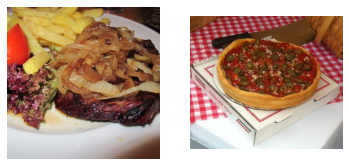

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

Our next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of your processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20).

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.


In [ ]:
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.) # its saying divide all our pixel values by 255
valid_datagen = ImageDataGenerator(rescale = 1/255.)


In [ ]:
# lets load in our image data from the directories
train_data = train_datagen.flow_from_directory(directory = train_dir,  # target directory of image
                                               target_size = (244,244), # Target size of images (height, width)
                                               class_mode = 'binary',   # the type of data we are working with Categorical or binary
                                               batch_size = 32)         # size of mini batches

test_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              target_size = (244, 244),
                                              class_mode = 'binary',
                                              batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# how many batches are there
len(train_data)

47

In [ ]:
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.4039216 , 0.23137257, 0.05490196],
          ...,
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.41960788, 0.24705884, 0.07058824],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.3921569 , 0.21960786, 0.04313726],
          ...,
          [0.44705886, 0.25490198, 0.09411766],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

In [ ]:
images[7].shape

(244, 244, 3)

In [ ]:
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
      dtype=float32)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
''' THIS IS A SIMPLE CNN '''

model_2 = Sequential([
    Conv2D(filters = 10,     # They are the sliding windows on an image or a filter in real sense
           kernel_size = 3,  # size of the filter
           strides = 1,      # Distance by how much the filter moves
           padding = 'valid',# Extra pixel added to boders to preserve the information ( WHEN WE WANT PADDING WE SET IT TO 'valid' )
           activation = 'relu',
           input_shape = (224, 224, 3)),  # input layer specified shape
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')  # the output layer
])



In [ ]:
# Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])



In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history_2 = model_2.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
# # Make the creating of our model a little easier
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
# from tensorflow.keras import Sequential

# ''' THIS IS A SIMPLE CNN '''

# model_2 = Sequential([
#     Conv2D(filters = 10,     # They are the sliding windows on an image or a filter in real sense
#            kernel_size = 3,  # size of the filter
#            strides = 1,      # Distance by how much the filter moves
#            padding = 'valid',# Extra pixel added to boders to preserve the information ( WHEN WE WANT PADDING WE SET IT TO 'valid' )
#            activation = 'relu',
#            input_shape = (224, 224, 3)),  # input layer specified shape
#     Conv2D(10, 3, activation = 'relu'),
#     Conv2D(10, 3, activation = 'relu'),
#     Flatten(),
#     Dense(1, activation = 'sigmoid')  # the output layer
# ])


# # Compile the model
# model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
#                 optimizer = Adam(),
#                 metrics = ['accuracy'])

# # # Fit the model
# model_2.fit(train_data,  # This is a combination of labels and smaples
#                         epochs = 5,
#                         steps_per_epoch = len(train_data), # this is telling to take 47 steps in each epoch as we want to go through all the batches
#                         validation_data = test_data,
#                         validation_steps = len(test_data))




In [ ]:
pd.DataFrame(history_2.history).plot(figsize = (10, 7))

NameError: ignored

In [ ]:
# # making Custom function TO PLOT VARIOUS LOSS CURVES

# def plot_loss_curves(history):

#   '''Return seperate loss curves for training and validation metrices'''
#   loss = history.history['loss']
#   val_loss = history.history['val_loss']

#   accuracy = history.history['accuracy']
#   val_accuracy = history.history['val_accuracy']

#   epochs = range(len(history.history['loss']))

#   # Plot the loss

#   plt.plot(epochs, loss, label = 'training_loss')
#   plt.plot(epochs, val_loss, label = 'validation_loss')
#   plt.title('loss')
#   plt.xlabel('epochs')
#   plt.legend()

#   # Plot the accuracy
#   plt.figure()  # this creates a new figure on which we plot these new curves
#   plt.plot(epochs, accuracy, label = 'training_accuracy')
#   plt.plot(epochs, val_loss, label = 'validation_accuracy')
#   plt.title('accuracy')
#   plt.xlabel('epochs')
#   plt.legend()





  # Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()  # this creates a new figure on which we plot these new curves
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

🔑 Note: When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished.

### Adjust the model parameters


### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [ ]:
# Creating New baseline (New model)
model_3 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),  # The MaxPool layer just pics the max value out of the feature in the 2x2 small slider and it reduces the feature to the max value only
    Conv2D(10, 3, activation ='relu'),
    tf.keras.layers.MaxPool2D(2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 274ms/step - loss: 0.6211 - accuracy: 0.6513 - val_loss: 0.4655 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4612 - accuracy: 0.7940 - val_loss: 0.3701 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4107 - accuracy: 0.8167 - val_loss: 0.3720 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3925 - accuracy: 0.8220 - val_loss: 0.3403 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3762 - accuracy: 0.8380 - val_loss: 0.3184 - val_accuracy: 0.8800


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)  

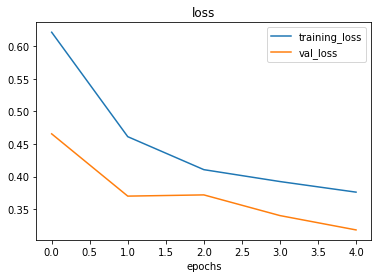

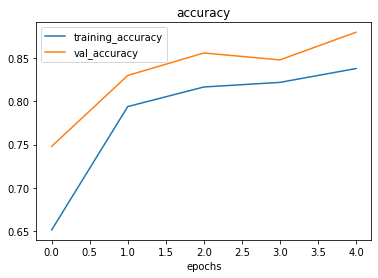

In [ ]:
plot_loss_curves(history_3)

Another way to reduce overfitting is data augmentation
In data augmentation we increase the number of data in our training set by bring certain changes like shear and rotation and many more

In [ ]:
# Create ImageDataGenerator training instances with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255. ,
                                                rotation_range = 0.2,
                                                zoom_range = 0.2,
                                                height_shift_range = 0.2,
                                                width_shift_range = 0.2,
                                                shear_range = 0.2,
                                                horizontal_flip = True)

# Create ImageDataGenerator training instances without data augmentation
train_data = ImageDataGenerator(rescale = 1/ 255.)

test_data = ImageDataGenerator(rescale = 1/ 255.)

## Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from training directory
print("Augmented Training Data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle =False)

# Create non-augmented train data batches
train_data_non = train_data.flow_from_directory(train_dir,
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'binary',
                                                shuffle = False)

''' TEST DATA is always not augmented '''

# Non Augmented test data
test_data_non = test_data.flow_from_directory(test_dir,
                                              target_size = (224, 224),
                                              batch_size = 32,
                                              class_mode = 'binary')

Augmented Training Data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data_non.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)

Showing image number: 22


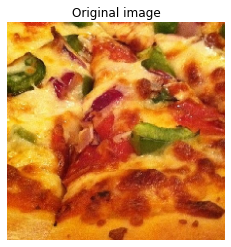

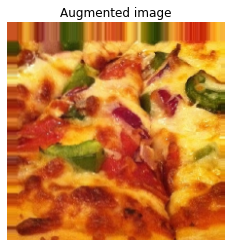

In [ ]:
import random
random_number = random.randint(0, 32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data_non,
                        validation_steps=len(test_data_non))

Epoch 1/5
47/47 [==============================] - 27s 519ms/step - loss: 0.7260 - accuracy: 0.4913 - val_loss: 0.6930 - val_accuracy: 0.4780
Epoch 2/5
47/47 [==============================] - 23s 495ms/step - loss: 0.6925 - accuracy: 0.5220 - val_loss: 0.6890 - val_accuracy: 0.5700
Epoch 3/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6950 - accuracy: 0.5153 - val_loss: 0.6868 - val_accuracy: 0.5680
Epoch 4/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6884 - accuracy: 0.5487 - val_loss: 0.6703 - val_accuracy: 0.6840
Epoch 5/5
47/47 [==============================] - 25s 526ms/step - loss: 0.6817 - accuracy: 0.5700 - val_loss: 0.6813 - val_accuracy: 0.6020


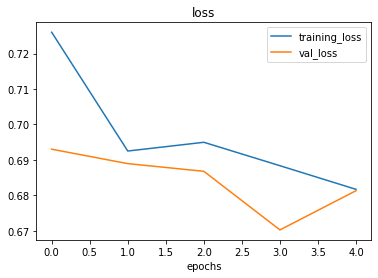

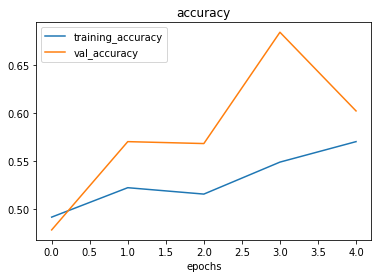

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size = (224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)


Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data_non,
                        validation_steps=len(test_data_non))

Epoch 1/5
47/47 [==============================] - 25s 486ms/step - loss: 0.6724 - accuracy: 0.5893 - val_loss: 0.5491 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 28s 598ms/step - loss: 0.6054 - accuracy: 0.6893 - val_loss: 0.5199 - val_accuracy: 0.7120
Epoch 3/5
47/47 [==============================] - 23s 494ms/step - loss: 0.5556 - accuracy: 0.7227 - val_loss: 0.4576 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 26s 551ms/step - loss: 0.5155 - accuracy: 0.7573 - val_loss: 0.3744 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 24s 517ms/step - loss: 0.5053 - accuracy: 0.7667 - val_loss: 0.3547 - val_accuracy: 0.8420


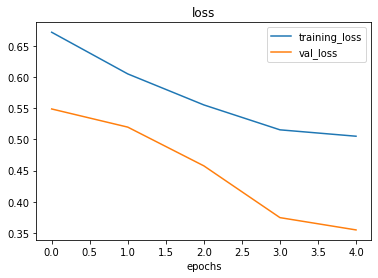

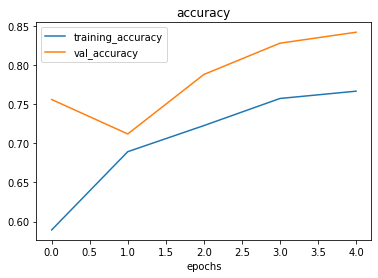

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

> 🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> 🛠 **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [ ]:
'''https://www.tensorflow.org/tutorials/load_data/images'''

In [ ]:
# Loading our custom image
!wget = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg'

--2023-02-21 04:12:27--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2023-02-21 04:12:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-02-21 04:12:28 (25.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

FINISHED --2023-02-21 04:12:28--
Total wall clock time: 0.5s
Downloaded: 1 files, 1.9M in 0.07s (25.7 MB/s)


(-0.5, 3023.5, 4031.5, -0.5)

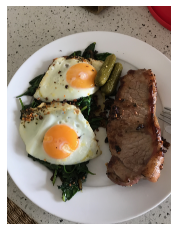

In [ ]:
steak = mpimg.imread('03-steak.jpeg') # matplotlib.images
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
pred = model_7.predict(steak)

NameError: ignored

> 🔑 **Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Making Custom Functiion to importa custom image and be able to use it in our model (rescale it to the one used in training)
def load_and_prep_image(filename, img_shape = 224):
  '''
  Read the image from the filename and turn it into a tensor and reshape it
  '''
  # Read the image
  img = tf.io.read_file(filename)

  # Decode the file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, (img_shape, img_shape))

  # Rescale the image
  img = img/255.

  return img


In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_7 = model_7.predict(steak) # as the input has 3 dim and model expects 4 one is the batch size

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

In [ ]:
class_names

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust differet hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

In [ ]:
!wget = 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'

--2023-02-22 15:20:47--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2023-02-22 15:20:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.201.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.201.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  84.9MB/s    in 6.8s    

2023-02-22 15:20:54 (72.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

FINISHED --2023-02-22 15:20:54--
Total wall clock time: 6.9s
Downloaded: 1 files, 495M in 6.8s (72.5 MB/s)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 10 directories and 0 ima

In [ ]:
train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

In [ ]:
# lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

NameError: ignored

In [ ]:
# Preprocesing data
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical')



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Creating Model

model_8 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation ='relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation ='relu'),
    Conv2D(10, 3, activation ='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 60s 209ms/step - loss: 2.1567 - accuracy: 0.2049 - val_loss: 2.0272 - val_accuracy: 0.2728
Epoch 2/5
235/235 [==============================] - 60s 255ms/step - loss: 1.9146 - accuracy: 0.3249 - val_loss: 1.9574 - val_accuracy: 0.2860
Epoch 3/5
235/235 [==============================] - 70s 298ms/step - loss: 1.5942 - accuracy: 0.4580 - val_loss: 1.9513 - val_accuracy: 0.3404
Epoch 4/5
235/235 [==============================] - 68s 289ms/step - loss: 0.9447 - accuracy: 0.6965 - val_loss: 2.5468 - val_accuracy: 0.2772
Epoch 5/5
235/235 [==============================] - 48s 206ms/step - loss: 0.3518 - accuracy: 0.8913 - val_loss: 3.7869 - val_accuracy: 0.2716


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 3.7869 - accuracy: 0.2716


[3.7869246006011963, 0.27160000801086426]

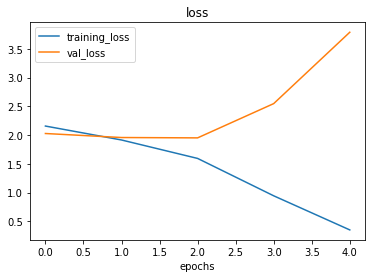

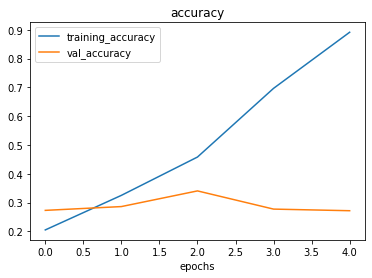

In [ ]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simpliy the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentaiton manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [ ]:
from keras.layers.serialization import activation
model_9 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size =2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_9.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_9 = model_9.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 50s 208ms/step - loss: 2.2688 - accuracy: 0.1863 - val_loss: 2.0574 - val_accuracy: 0.2508
Epoch 2/5
235/235 [==============================] - 47s 199ms/step - loss: 1.7964 - accuracy: 0.3881 - val_loss: 2.0275 - val_accuracy: 0.2672
Epoch 3/5
235/235 [==============================] - 45s 193ms/step - loss: 1.2339 - accuracy: 0.6029 - val_loss: 2.1542 - val_accuracy: 0.2792
Epoch 4/5
235/235 [==============================] - 47s 201ms/step - loss: 0.6579 - accuracy: 0.7980 - val_loss: 2.7265 - val_accuracy: 0.2664
Epoch 5/5
235/235 [==============================] - 44s 189ms/step - loss: 0.3040 - accuracy: 0.9235 - val_loss: 3.3541 - val_accuracy: 0.2620


In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 3.3541 - accuracy: 0.2620


[3.354079008102417, 0.2619999945163727]

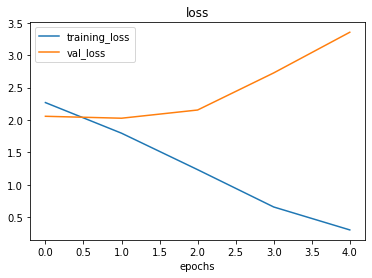

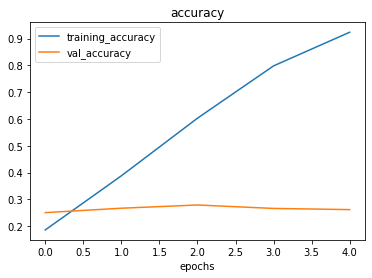

In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 29160)             0         
                                                                 
 dense_12 (Dense)            (None, 10)              

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
train_data_gen_aug = ImageDataGenerator(rescale=1/255.,
                                        rotation_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True)


train_data_aug = train_data_gen_aug.flow_from_directory(train_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
from keras.losses import categorical_crossentropy
model_10 = tf.keras.models.clone_model(model_8)

model_10.compile(loss = 'categorical_crossentropy',
                 optimizer = Adam(),
                 metrics = ['accuracy'])

In [ ]:
history_10 = model_10.fit(train_data_aug,
                          epochs=5,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 135s 561ms/step - loss: 2.2523 - accuracy: 0.1589 - val_loss: 2.1339 - val_accuracy: 0.2248
Epoch 2/5
235/235 [==============================] - 119s 506ms/step - loss: 2.1275 - accuracy: 0.2345 - val_loss: 1.9918 - val_accuracy: 0.2828
Epoch 3/5
235/235 [==============================] - 115s 491ms/step - loss: 2.0539 - accuracy: 0.2689 - val_loss: 1.9258 - val_accuracy: 0.3140
Epoch 4/5
235/235 [==============================] - 126s 537ms/step - loss: 1.9959 - accuracy: 0.2951 - val_loss: 1.8324 - val_accuracy: 0.3704
Epoch 5/5
235/235 [==============================] - 117s 498ms/step - loss: 1.9521 - accuracy: 0.3240 - val_loss: 1.8432 - val_accuracy: 0.3736


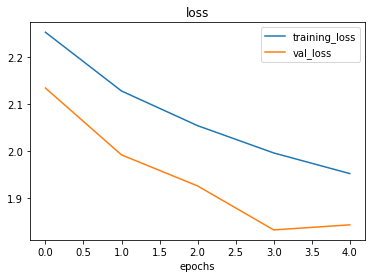

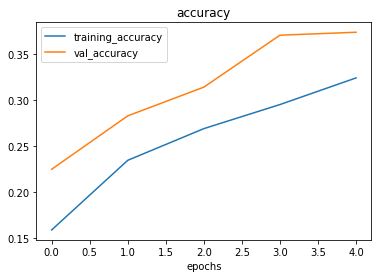

In [ ]:
plot_loss_curves(history_10)

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-02-22 15:53:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2023-02-22 15:53:57 (43.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-02-22 15:53:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)
  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 231ms/step
[[0.0143431  0.02041662 0.0218815  0.0100387  0.06907158 0.10890934
  0.36768222 0.02605138 0.01236305 0.34924254]]


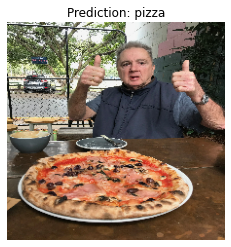

In [ ]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)